In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#忽略警告
import warnings
warnings.filterwarnings('ignore')
#显示中文
plt.rcParams['font.sans-serif']='SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus']=False # 设置显示负号

In [2]:
data=pd.read_csv('../DS_day03/data/unique.csv')
data.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22


# 数据的描述性统计分析

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 13 columns):
store_id        22293 non-null int64
city            22293 non-null object
channel         22293 non-null object
gender_group    22293 non-null object
age_group       22293 non-null object
wkd_ind         22293 non-null object
product         22293 non-null object
customer        22293 non-null int64
revenue         22293 non-null float64
order           22293 non-null int64
quant           22293 non-null int64
unit_cost       22293 non-null int64
unit_price      22293 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 2.2+ MB


In [4]:
data.describe()

,store_id,customer,revenue,order,quant,unit_cost,unit_price
count,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,335.391558,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998
std,230.236167,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000
25%,142.000000,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000


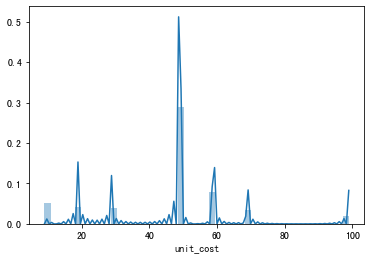

In [5]:
# 分析一下成本
sns.distplot(data['unit_cost'])

In [6]:
data['unit_cost'].value_counts()
# 发现成本并不是连续的，有点像类别型，所以用直方图

49    11586
59     3169
9      2053
19     1694
29     1572
69     1412
99      807
Name: unit_cost, dtype: int64

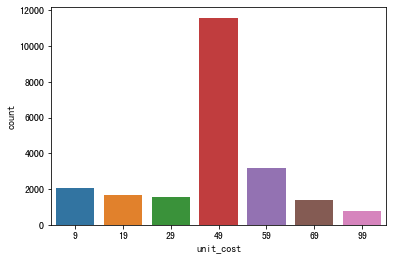

In [7]:
sns.countplot(x=data['unit_cost'])

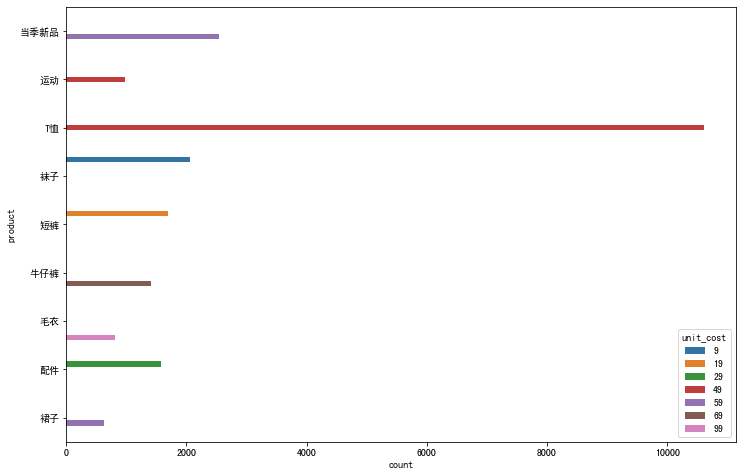

In [8]:
# 不同产品的成本
plt.figure(figsize=(12,8))
sns.countplot(data=data,y='product',hue='unit_cost')
# 可以得出每个产品的成本是一样的

In [9]:
# 用groupby也可以求

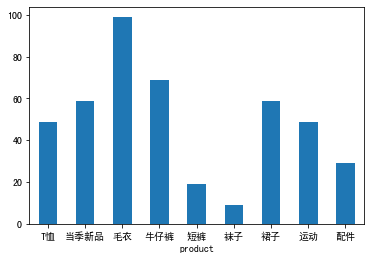

In [10]:
data.groupby('product')['unit_cost'].mean().plot(kind='bar',rot=0)

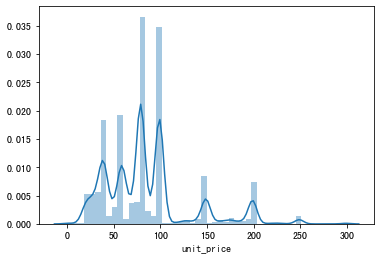

In [11]:
# 售价
sns.distplot(data['unit_price'])

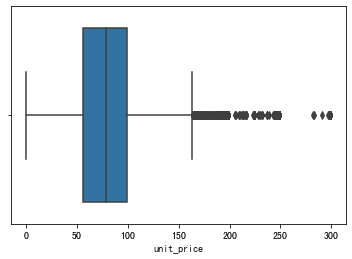

In [12]:
sns.boxplot(x=data['unit_price'])
# 有很多异常数据值啊，仔细看看

In [13]:
data['unit_price'].describe()

count    22293.000000
mean        84.279998
std         46.314296
min          0.000000
25%         56.000000
50%         79.000000
75%         99.000000
max        299.000000
Name: unit_price, dtype: float64

In [14]:
# 上边缘
99+(99-56)*1.5 # 163.5

163.5

In [15]:
data.groupby('product')['unit_price'].describe() # 这个也可以describe()。。。

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
T恤,10610.0,83.958907,25.500706,0.0,76.0,79.0,99.0,249.0
当季新品,2540.0,95.556693,48.807573,0.0,58.0,79.0,139.0,199.0
毛衣,807.0,180.375465,50.793813,0.0,149.0,199.0,199.0,249.0
牛仔裤,1412.0,90.817280,60.411258,0.0,39.0,59.0,149.0,199.0
短裤,1694.0,38.525974,8.684003,0.0,33.0,39.0,40.0,79.0
袜子,2053.0,39.690697,23.437306,0.0,22.0,27.0,59.0,79.0
裙子,629.0,138.961844,50.560664,10.0,91.0,149.0,199.0,199.0
运动,976.0,68.232582,46.268893,0.0,38.0,39.0,99.0,249.0
配件,1572.0,108.644402,51.477286,0.0,79.0,98.0,149.0,299.0


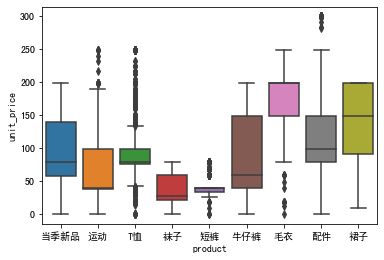

In [16]:
sns.boxplot(x=data['product'],y=data['unit_price'])

In [17]:
data.select_dtypes('object').describe().T

,count,unique,top,freq
city,22293,10,深圳,4364
channel,22293,2,线下,18403
gender_group,22293,3,Female,14208
age_group,22293,11,30-34,4426
wkd_ind,22293,2,Weekday,12465
product,22293,9,T恤,10610


In [18]:
data.describe()

,store_id,customer,revenue,order,quant,unit_cost,unit_price
count,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,335.391558,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998
std,230.236167,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000
25%,142.000000,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000


# 预处理
1. 取出营业额大于0的数据
2. 得到新的一列、利润
3. 性别异常值检查
4. 年龄这一列检查异常值

In [19]:
data_sales=data[data['revenue']>0]

In [20]:
# 营业额/数量-成本
data_profit=data['revenue']/data['quant']-data['unit_cost']
data_profit
data_sales['margin']=np.round(data_profit,2)
data_sales.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price,margin
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199,140.00
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149,100.00
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89,40.00
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59,10.00
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22,12.67


In [21]:
data_sales['gender_group'].value_counts()

Female    14186
Male       7958
Unkown      118
Name: gender_group, dtype: int64

In [22]:
# 性别缺失值不多，删掉好了
data_sales=data_sales[data_sales['gender_group'].isin(['Female','Male'])]
data_sales['gender_group'].value_counts()

Female    14186
Male       7958
Name: gender_group, dtype: int64

In [24]:
# 
data_sales=data_sales[~data_sales['age_group'].isin(['Unkown'])]# ~表示取非
data_sales['age_group'].value_counts()

30-34    4423
25-29    4220
35-39    3688
20-24    3339
40-44    1949
>=60     1570
45-49    1093
50-54     669
<20       659
55-59     513
Name: age_group, dtype: int64

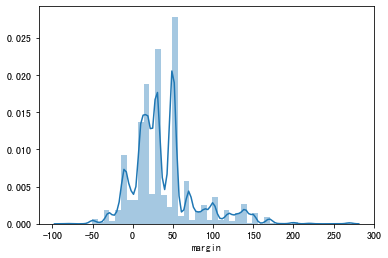

In [25]:
# 分析利润
sns.distplot(data_sales['margin'])

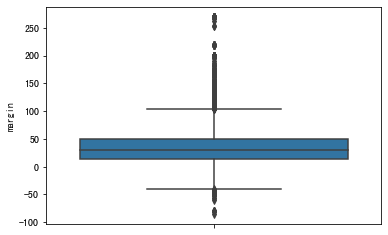

In [26]:
sns.boxplot(y=data_sales['margin'])